<a href="https://colab.research.google.com/github/pininduwk/pininduwk/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies and Setup

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.6.3
bleach                        6.0.0
blis  

In [14]:
import tensorflow as tf
import os

In [15]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

RuntimeError: ignored

In [16]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [17]:
import cv2
import imghdr

In [18]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/data' 

In [19]:
#import zipfile

#zip_path = ('/content/drive/MyDrive/Colab Notebooks/data/happy/f735f320-5237-4273-95cd-b5552549e308.zip', '/content/drive/MyDrive/Colab Notebooks/data/sad/3a6ac1c4-ab07-4647-82a9-3013bd5d4823.zip')
#extract_path = ('/content/drive/MyDrive/Colab Notebooks/data/happy', '/content/drive/MyDrive/Colab Notebooks/data/sad')

#for i in range(len(zip_path)):
    #with zipfile.ZipFile(zip_path[i], 'r') as zip_ref:
        #zip_ref.extractall(extract_path[i])


In [20]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [21]:
from os import listdir
from os.path import isfile, join
import cv2

mypath = ["/content/drive/MyDrive/Colab Notebooks/data/happy", "/content/drive/MyDrive/Colab Notebooks/data/sad"]
onlyfiles = []
for path in mypath:
    onlyfiles.extend([f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.jpg')])

images = []
for file in onlyfiles:
    image = cv2.imread(join(path, file))
    images.append(image)


# 3. Load Data

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/data')

Found 298 files belonging to 2 classes.


In [24]:
data_iterator = data.as_numpy_iterator()

In [25]:
batch = data_iterator.next()

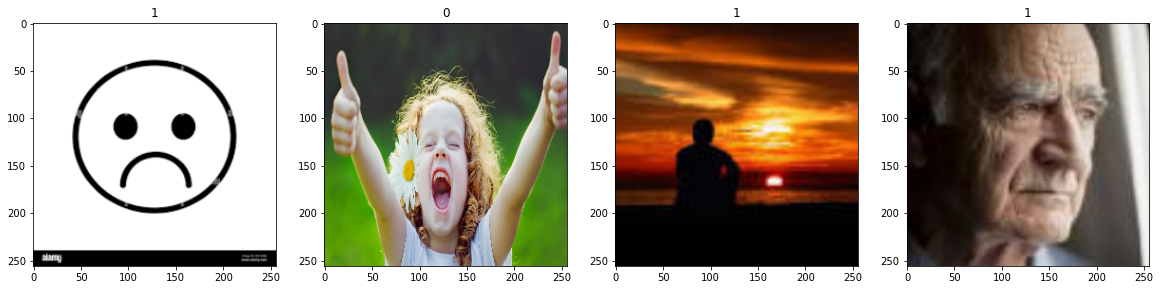

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [27]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [28]:
data.as_numpy_iterator().next()

(array([[[[0.30710784, 0.2616728 , 0.18916973],
          [0.32109374, 0.2779565 , 0.20258884],
          [0.45291054, 0.3699142 , 0.24535845],
          ...,
          [0.30101103, 0.28924632, 0.2304228 ],
          [0.37124693, 0.335095  , 0.2865043 ],
          [0.37156862, 0.3209712 , 0.2564338 ]],
 
         [[0.37719056, 0.3272212 , 0.24165134],
          [0.52288604, 0.45546874, 0.34731925],
          [0.5679534 , 0.45574448, 0.29404107],
          ...,
          [0.24471508, 0.23586091, 0.18880208],
          [0.3860907 , 0.34393382, 0.30569854],
          [0.3647212 , 0.31079963, 0.24410233]],
 
         [[0.6844822 , 0.6021293 , 0.486443  ],
          [0.5024663 , 0.41240808, 0.28687194],
          [0.65006125, 0.5178003 , 0.3387561 ],
          ...,
          [0.22628677, 0.21452206, 0.17922795],
          [0.31196386, 0.2868413 , 0.2407169 ],
          [0.28935355, 0.2505055 , 0.20363052]],
 
         ...,
 
         [[0.32512254, 0.27022058, 0.2329657 ],
          [0.22467

# 5. Split Data

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [30]:
train_size

7

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# 7. Train

In [37]:
logdir='logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [42]:
hist = model.fit(train, epochs=200, validation_data=val, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/200
7/7 [==============================] - 21s 791ms/step - loss: 1.1554 - accuracy: 0.5089 - val_loss: 0.6981 - val_accuracy: 0.5312
Epoch 2/200
7/7 [==============================] - 9s 911ms/step - loss: 0.6833 - accuracy: 0.6116 - val_loss: 0.6539 - val_accuracy: 0.4844
Epoch 3/200
7/7 [==============================] - 9s 735ms/step - loss: 0.6527 - accuracy: 0.6161 - val_loss: 0.6170 - val_accuracy: 0.7500
Epoch 4/200
7/7 [==============================] - 9s 949ms/step - loss: 0.5443 - accuracy: 0.7768 - val_loss: 0.4363 - val_accuracy: 0.7500
Epoch 5/200
7/7 [==============================] - 7s 729ms/step - loss: 0.4173 - accuracy: 0.8214 - val_loss: 0.4085 - val_accuracy: 0.8438
Epoch 6/200
7/7 [==============================] - 9s 759ms/step - loss: 0.3391 - accuracy: 0.8705 - val_loss: 0.2267 - val_accuracy: 0.9219
Epoch 7/200
7/7 [==============================] - 9s 959ms/step - loss: 0.3888 - accuracy: 0.8170 - val_loss: 0.4259 - val_accuracy: 0.8594
Epoch 8/200


# 8. Plot Performance

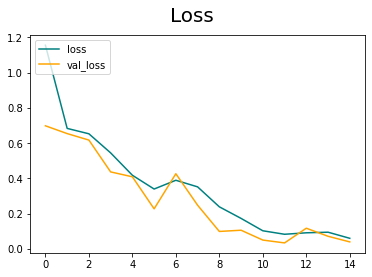

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

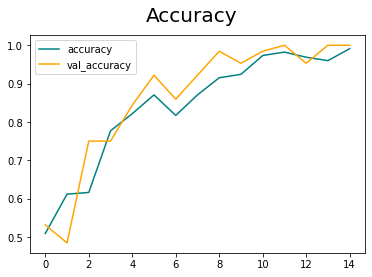

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 314ms/step


In [48]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

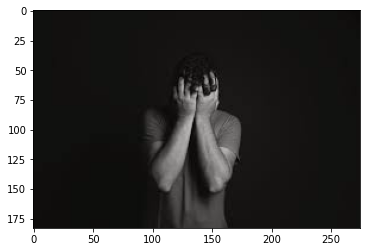

In [61]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/sad test.jfif')
plt.imshow(img)
plt.show()

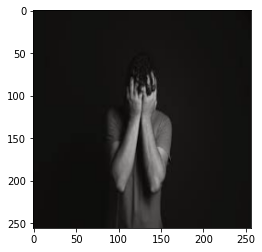

In [62]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 114ms/step


In [64]:
yhat

array([[0.99995375]], dtype=float32)

In [65]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
